In [1]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(precision=4)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [4]:
for element in dataset:
    print(element.numpy())

8
3
0
8
2
1


In [5]:
it = iter(dataset)
print(next(it).numpy())

8


In [6]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22


In [7]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [8]:
for element in dataset1:
    print(element)

tf.Tensor([0.1961 0.8014 0.5649 0.2917 0.773  0.4386 0.1796 0.733  0.8526 0.6116], shape=(10,), dtype=float32)
tf.Tensor([0.8563 0.918  0.5223 0.0942 0.8692 0.7005 0.3821 0.441  0.3546 0.2395], shape=(10,), dtype=float32)
tf.Tensor([0.0482 0.5083 0.2348 0.6653 0.7991 0.194  0.9045 0.6028 0.608  0.6331], shape=(10,), dtype=float32)
tf.Tensor([0.257  0.7142 0.3468 0.8455 0.654  0.7613 0.1729 0.4222 0.4112 0.0547], shape=(10,), dtype=float32)


In [9]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
     tf.random.uniform([4, 100], maxval=100, dtype=tf.int32))
)
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [10]:
for elementA, elementB in dataset2:
    print(elementB)

tf.Tensor(
[ 8 97 11 30 70 68 68 11 29 60 47 44 30  1 94 84 10 38 35 53 98 11 85 40
 88 85 79 65 61 83 52 88 12 64 17 73 93 59 39 86  3 30  6 63 18 43 53 93
 96 68 25 92 17 35 71 96 10 28 81 40 81 94 11 61 24 88 23 38 35 63 43  6
 27 10 59 97  8 54 54 31 44 49 14 50 55 12 11 26 81 85 94 77 57 18  2 74
 39 60 31 82], shape=(100,), dtype=int32)
tf.Tensor(
[ 8  5 11 14 66 50 64 92 76 78  5 77 33 69 27 23 50 94 17 11 89  3 87 38
 19 99 68 68 38 81 83 66 81  3 13 33 62 61 50 56 67  7 80 71 78 15 21 93
 94 12 82 49 16 64 73  6 30 59 29 91  7 79 64 88 32 50 10 85 36 66 59 64
 36 74 76 71 68 12 95 55 96 21 10 30 87 32 36 15 12 38 78 34 37 65  0 68
 23 30 76 31], shape=(100,), dtype=int32)
tf.Tensor(
[27 65 29 68 41 20  0 18 32 75 47 63 19 56 15 43 32 61 56 64 84 96 66 12
 32 45 78 99 14 97 89 65 65 49 44 17 39 91 35 23 62 79 71 25 90 91 78 65
 55 50  4 16 94 41 75 50 59 98 63 96 96 29 64 61 16 41 11  2 48 97 43 17
 51 28 47 51 10 70 44 16 48 99 10 88 64  8 27 91 76 50 90 44 48 13 51 89
 39 61 

In [11]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [12]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0,0], [1,2]], values=[1,2], dense_shape=[3,4]))
print(dataset4.element_spec)
print(dataset4.element_spec.value_type)

SparseTensorSpec(TensorShape([3, 4]), tf.int32)
<class 'tensorflow.python.framework.sparse_tensor.SparseTensor'>


In [13]:
for elementA in dataset4:
    print(elementA)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [14]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4,10], minval=1, maxval=10, dtype=tf.int32))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.int32, name=None)

In [15]:
for element in dataset1:
    print(element)

tf.Tensor([3 4 6 3 9 2 7 8 9 5], shape=(10,), dtype=int32)
tf.Tensor([3 9 2 3 8 3 6 4 9 2], shape=(10,), dtype=int32)
tf.Tensor([8 8 7 9 3 6 7 9 2 9], shape=(10,), dtype=int32)
tf.Tensor([1 7 6 9 8 9 7 2 4 5], shape=(10,), dtype=int32)


In [16]:
for z in dataset1:
    print(z.numpy())

[3 4 6 3 9 2 7 8 9 5]
[3 9 2 3 8 3 6 4 9 2]
[8 8 7 9 3 6 7 9 2 9]
[1 7 6 9 8 9 7 2 4 5]


In [17]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]), tf.random.uniform([4, 100], maxval=100, dtype=tf.int32))
)

In [18]:
for elementA, elementB in dataset2:
    print(elementB)

tf.Tensor(
[33 55 62 21 65 37 80 46 42 48 97 81 63 90  3 56 28 68 82 18 69 12 65 94
 75  4  8 38 94 39 57 71 92 18 33 85 26 20 59 57 54 18 48 59 45 97 52 51
  3 19 58 70 85 91 25 85  7 77 43 85 18 69 25 40 84 44 18 32 41 90 15  1
 85 19 65 86 31 35 89 84 91 52 43 57 10 20 43 96 31 77 96 68  6 84 18 65
 97 84 79 51], shape=(100,), dtype=int32)
tf.Tensor(
[76 94  4 78 46 50  5 37 29 45 43 43 90  7 34 37 64  4 12 72 50 95 98 46
 89  8 64 36 45 38 91 93 74 16 63 23 75 95 82 34 51 62 72 38 38 16 59 64
 43 48 98 75 65 79 91 86 22 41 25 40 97 71 33 18 52 64 72 48 83 30 44 13
 69 32  5 41 28  5 11 89 82 93 74 29 67 58 65 22 10 66  1 91 32 40 64 14
 90 56 68 69], shape=(100,), dtype=int32)
tf.Tensor(
[51 39 81  0  7 87 75 10 67 19 60  0 51 78 77 92  8 33 48 44 89 74 78 68
 96  2 51 32 10  8 18 78 26 50 49 27 69 43 95 48 82 84 53 58 14 43 98 35
 19 47  5 99 72 47 60 57 89  3 47 79 47  5 48 16 92 15 13 15  6 18 88 87
 67 83 92 24 62 88 38 80 12 96 37 60 99 16 84 75  6 35 13 43 48 41 67 42
 29 83 

In [19]:
dataset3 = tf.data.Dataset.zip((dataset1,dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.int32, (tf.float32, tf.int32))>

In [20]:
for elementaA, (elementB, elementC) in dataset3:
    print(elementA, elementB, elementC)

tf.Tensor(0.9673878, shape=(), dtype=float32) tf.Tensor(0.1739533, shape=(), dtype=float32) tf.Tensor(
[33 55 62 21 65 37 80 46 42 48 97 81 63 90  3 56 28 68 82 18 69 12 65 94
 75  4  8 38 94 39 57 71 92 18 33 85 26 20 59 57 54 18 48 59 45 97 52 51
  3 19 58 70 85 91 25 85  7 77 43 85 18 69 25 40 84 44 18 32 41 90 15  1
 85 19 65 86 31 35 89 84 91 52 43 57 10 20 43 96 31 77 96 68  6 84 18 65
 97 84 79 51], shape=(100,), dtype=int32)
tf.Tensor(0.9673878, shape=(), dtype=float32) tf.Tensor(0.80285454, shape=(), dtype=float32) tf.Tensor(
[76 94  4 78 46 50  5 37 29 45 43 43 90  7 34 37 64  4 12 72 50 95 98 46
 89  8 64 36 45 38 91 93 74 16 63 23 75 95 82 34 51 62 72 38 38 16 59 64
 43 48 98 75 65 79 91 86 22 41 25 40 97 71 33 18 52 64 72 48 83 30 44 13
 69 32  5 41 28  5 11 89 82 93 74 29 67 58 65 22 10 66  1 91 32 40 64 14
 90 56 68 69], shape=(100,), dtype=int32)
tf.Tensor(0.9673878, shape=(), dtype=float32) tf.Tensor(0.6193943, shape=(), dtype=float32) tf.Tensor(
[51 39 81  0  7 87 75 

In [21]:
for a, (b,c) in dataset3:
    print("shapes: {a.shape}, {b.shape}, {c.shape}".format(a=a, b=b, c=c))

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


In [22]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [23]:
images, labels = train
images = images/255
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

In [24]:
def count(stop):
    i = 0
    while i < stop:
        yield i
        i += 1
for n in count(5):
    print(n)

0
1
2
3
4


In [25]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes = ())

In [26]:
for elem in ds_counter:
    print(elem)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(24, shape=(), dtype=int32)


In [27]:
for count_batch in ds_counter.repeat().batch(15).take(10):
    print(count_batch.numpy())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4  5  6  7  8  9]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4  5  6  7  8  9]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [28]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0, 10)
        yield i, np.random.normal(size=(size,))
        i += 1

for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [ 1.1154 -0.0815  1.1326]
1 : [-1.2668  2.273  -0.2002  0.5862  1.4021 -1.5203 -0.3384]
2 : [ 0.8081 -1.042   1.4304  0.2034 -0.6105]
3 : [ 0.758   0.5702  0.2888 -1.1642 -0.9666  0.3524  0.0821]
4 : [-1.6482  1.4152 -0.6461 -0.1642 -0.4073  0.128 ]
5 : [ 1.9718  0.4388  0.962  -1.4944  0.2357 -1.8787  0.4399  0.63  ]
6 : [0.0997 0.8518]


In [29]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types=(tf.int32, tf.float32),
    output_shapes=((), (None,))
)
ds_series.element_spec

(TensorSpec(shape=(), dtype=tf.int32, name=None),
 TensorSpec(shape=(None,), dtype=tf.float32, name=None))

In [30]:
for elementA, elementB in ds_series:
    print(elementA, elementB)
    break

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor([ 1.0072  0.6883 -0.5032 -0.7667  0.0802  2.6537 -0.7576 -1.0357], shape=(8,), dtype=float32)


In [31]:
ds_series_batch = ds_series.shuffle(25).padded_batch(5, padded_shapes=([], [None]))
ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[23  4  0  6  1]

[[-0.7618 -1.5321  0.      0.      0.    ]
 [ 0.0304 -0.7325  0.2241 -0.1239  1.0073]
 [-1.3001 -0.863   0.3071  0.      0.    ]
 [ 2.0607 -0.7594  1.1718  0.      0.    ]
 [-0.4216 -0.2453  1.3056 -0.486  -1.5445]]


In [32]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

In [33]:
ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 8  7 11 22  5  2 15  3 21 28]

[[-0.6403 -0.9891 -0.5406 -0.6778  0.      0.      0.      0.      0.    ]
 [ 0.8158  0.7229  0.5761  0.      0.      0.      0.      0.      0.    ]
 [ 0.4336 -1.0654 -0.1576 -0.1159  0.2915 -2.0085  0.3722  1.3389  0.6451]
 [-0.0592 -1.3337  1.9486 -1.2863 -1.4     1.3719 -0.6213  0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.0307 -1.7982  0.      0.      0.      0.      0.      0.      0.    ]
 [ 1.8506  1.168   0.2564  0.4949  1.1962  1.2475  0.4683 -0.8529  0.    ]
 [ 0.8793  0.7365  0.7998  0.7646 -0.9277  0.4767  1.6553  0.      0.    ]
 [ 0.1142  1.2915 -0.7326  0.961   0.5967 -0.1972  0.      0.      0.    ]
 [-0.2793  0.2048 -0.3307 -0.0331  0.8397  0.2184  0.3466  0.2475 -0.0707]]


In [34]:
flowers = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)

In [35]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [36]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [37]:
ds = tf.data.Dataset.from_generator(
    img_gen.flow_from_directory, args=[flowers],
    output_types=(tf.float32, tf.float32),
    output_shapes=([32, 256, 256, 3], [32,5])
)
print(ds.element_spec)

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))


In [38]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

In [39]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [40]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())
parsed.features.feature["image/text"]

bytes_list {
  value: "Rue Perreyon"
}

In [41]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ["cowper.txt","derby.txt","butler.txt"]
file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name) for file_name in file_names
]

In [42]:
dataset = tf.data.TextLineDataset(file_paths)
for line in dataset.take(5):
    print(line)

tf.Tensor(b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;", shape=(), dtype=string)
tf.Tensor(b'His wrath pernicious, who ten thousand woes', shape=(), dtype=string)
tf.Tensor(b"Caused to Achaia's host, sent many a soul", shape=(), dtype=string)
tf.Tensor(b'Illustrious into Ades premature,', shape=(), dtype=string)
tf.Tensor(b'And Heroes gave (so stood the will of Jove)', shape=(), dtype=string)


In [43]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

In [44]:
for i, line in enumerate(lines_ds.take(10)):
    if i % 3 == 0:
        print()
    print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'

b'Illustrious into Ades premature,'


In [45]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [46]:
for line in titanic_lines.take(10):
    print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [47]:
def survived(line):
    return tf.not_equal(tf.strings.substr(line, 0, 1), "0")
survivors = titanic_lines.skip(1).filter(survived)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [48]:
for surv in survivors.take(10):
    print(surv)

tf.Tensor(b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n', shape=(), dtype=string)
tf.Tensor(b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y', shape=(), dtype=string)
tf.Tensor(b'1,female,35.0,1,0,53.1,First,C,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n', shape=(), dtype=string)
tf.Tensor(b'1,female,4.0,1,1,16.7,Third,G,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y', shape=(), dtype=string)
tf.Tensor(b'1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y', shape=(), dtype=string)
tf.Tensor(b'1,male,28.0,0,0,35.5,First,A,Southampton,y', shape=(), dtype=string)
tf.Tensor(b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n', shape=(), dtype=string)


In [49]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file, index_col=None)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [50]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

In [51]:
for feature_batch in titanic_slices.take(2):
    for key, value in  feature_batch.items():
        print(" {!r:20s}: {} ".format(key, value))
    print()

'survived'          : 0 
 'sex'               : b'male' 
 'age'               : 22.0 
 'n_siblings_spouses': 1 
 'parch'             : 0 
 'fare'              : 7.25 
 'class'             : b'Third' 
 'deck'              : b'unknown' 
 'embark_town'       : b'Southampton' 
 'alone'             : b'n' 

 'survived'          : 1 
 'sex'               : b'female' 
 'age'               : 38.0 
 'n_siblings_spouses': 1 
 'parch'             : 0 
 'fare'              : 71.2833 
 'class'             : b'First' 
 'deck'              : b'C' 
 'embark_town'       : b'Cherbourg' 
 'alone'             : b'n' 



In [52]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4, label_name="survived"
)

In [53]:
for feature_batch, label_batch in titanic_batches.take(2):
    print("survived : {}".format(label_batch))
    print("features:")
    for key, value in feature_batch.items():
        print(" {!r:20s}:{} ".format(key, value))
    print()

survived : [0 0 1 1]
features:
 'sex'               :[b'male' b'male' b'female' b'female'] 
 'age'               :[28. 28. 18. 24.] 
 'n_siblings_spouses':[0 0 0 0] 
 'parch'             :[0 0 1 0] 
 'fare'              :[ 7.7333  7.75   23.     13.    ] 
 'class'             :[b'Third' b'Third' b'Second' b'Second'] 
 'deck'              :[b'unknown' b'unknown' b'unknown' b'F'] 
 'embark_town'       :[b'Queenstown' b'Queenstown' b'Southampton' b'Southampton'] 
 'alone'             :[b'y' b'y' b'n' b'y'] 

survived : [0 1 1 0]
features:
 'sex'               :[b'female' b'male' b'female' b'male'] 
 'age'               :[14. 28. 39. 26.] 
 'n_siblings_spouses':[0 0 1 0] 
 'parch'             :[0 0 1 0] 
 'fare'              :[ 7.8542 13.     79.65    7.8958] 
 'class'             :[b'Third' b'Second' b'First' b'Third'] 
 'deck'              :[b'unknown' b'unknown' b'E' b'unknown'] 
 'embark_town'       :[b'Southampton' b'Southampton' b'Southampton' b'Southampton'] 
 'alone'             :[

In [54]:
titanic_batches = tf.data.experimental.make_csv_dataset(titanic_file, batch_size=4, label_name="survived", select_columns=['class', 'fare', 'survived'])

In [55]:
for feature_batch, label_batch in titanic_batches.take(1):
    print("survived : {}".format(label_batch))
    for key, value in feature_batch.items():
        print(" {!r:20s}: {} ".format(key, value))

survived : [1 0 1 1]
 'fare'              : [ 13.      16.1     79.2    135.6333] 
 'class'             : [b'Second' b'Third' b'First' b'First'] 


In [56]:
titanic_file

'/home/matheus/.keras/datasets/train.csv'

In [57]:
titanic_batches = tf.data.experimental.make_csv_dataset(titanic_file, batch_size=4, label_name="survived", select_columns=['class','fare','survived'])

In [58]:
for feature_batch, label_batch in titanic_batches.take(1):
    print("survived: {}".format(label_batch))
    for key, value in feature_batch.items():
        print("  {!r:20s}: {}  ".format(key, value))

survived: [0 1 1 1]
  'fare'              : [ 25.4667 120.      12.2875   8.6625]  
  'class'             : [b'Third' b'First' b'Third' b'Third']  


In [59]:
titanic_types = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types, header=True)
for line in dataset.take(10):
    print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [61]:
%%writefile missing.csv
1,2,3,4
,2,3,4
1,,3,4
1,2,,4
1,2,3,
,,,

Overwriting missing.csv


In [65]:
record_defaults = [999, 998, 997, 996]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults)
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<MapDataset shapes: (4,), types: tf.int32>

In [66]:
for line in dataset:
    print(line.numpy())

[1 2 3 4]
[999   2   3   4]
[  1 998   3   4]
[  1   2 997   4]
[  1   2   3 996]
[999 998 997 996]


In [68]:
record_defaults = [999, 999]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults, select_cols=[1, 3])
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<MapDataset shapes: (2,), types: tf.int32>

In [69]:
for line in dataset:
    print(line.numpy())

[2 4]
[2 4]
[999   4]
[2 4]
[  2 999]
[999 999]


In [71]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)
flowers_root = pathlib.Path(flowers_root)
flowers_root

PosixPath('/home/matheus/.keras/datasets/flower_photos')

In [72]:
for item in flowers_root.glob("*"):
    print(item)

/home/matheus/.keras/datasets/flower_photos/sunflowers
/home/matheus/.keras/datasets/flower_photos/roses
/home/matheus/.keras/datasets/flower_photos/daisy
/home/matheus/.keras/datasets/flower_photos/dandelion
/home/matheus/.keras/datasets/flower_photos/LICENSE.txt
/home/matheus/.keras/datasets/flower_photos/tulips


In [73]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
for f in list_ds.take(5):
    print(f.numpy())

b'/home/matheus/.keras/datasets/flower_photos/tulips/8713398614_88202e452e_n.jpg'
b'/home/matheus/.keras/datasets/flower_photos/daisy/4540555191_3254dc4608_n.jpg'
b'/home/matheus/.keras/datasets/flower_photos/sunflowers/4872892690_52dc25b0b4.jpg'
b'/home/matheus/.keras/datasets/flower_photos/tulips/14068200854_5c13668df9_m.jpg'
b'/home/matheus/.keras/datasets/flower_photos/sunflowers/5027895361_ace3b731e5_n.jpg'


In [75]:
def process_path(file_path):
    label = tf.strings.split(file_path, '/')[-2]
    return tf.io.read_file(file_path), label
labeled_ds = list_ds.map(process_path)
labeled_ds

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [78]:
for image_raw, label_text in labeled_ds.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02'

b'roses'


In [80]:
inc_dataset = tf.data.Dataset.range(100)
inc_dataset

<RangeDataset shapes: (), types: tf.int64>

In [81]:
for i in inc_dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)
tf.Tensor(20, shape=(), dtype=int64)
tf.Tensor(21, shape=(), dtype=int64)
tf.Tensor(22, shape=(), dtype=int64)
tf.Tensor(23, shape=(), dtype=int64)
tf.Tensor(24, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(26, shape=(), dtype=int64)
tf.Tensor(2

In [86]:
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dec_dataset
for i in dec_dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(-1, shape=(), dtype=int64)
tf.Tensor(-2, shape=(), dtype=int64)
tf.Tensor(-3, shape=(), dtype=int64)
tf.Tensor(-4, shape=(), dtype=int64)
tf.Tensor(-5, shape=(), dtype=int64)
tf.Tensor(-6, shape=(), dtype=int64)
tf.Tensor(-7, shape=(), dtype=int64)
tf.Tensor(-8, shape=(), dtype=int64)
tf.Tensor(-9, shape=(), dtype=int64)
tf.Tensor(-10, shape=(), dtype=int64)
tf.Tensor(-11, shape=(), dtype=int64)
tf.Tensor(-12, shape=(), dtype=int64)
tf.Tensor(-13, shape=(), dtype=int64)
tf.Tensor(-14, shape=(), dtype=int64)
tf.Tensor(-15, shape=(), dtype=int64)
tf.Tensor(-16, shape=(), dtype=int64)
tf.Tensor(-17, shape=(), dtype=int64)
tf.Tensor(-18, shape=(), dtype=int64)
tf.Tensor(-19, shape=(), dtype=int64)
tf.Tensor(-20, shape=(), dtype=int64)
tf.Tensor(-21, shape=(), dtype=int64)
tf.Tensor(-22, shape=(), dtype=int64)
tf.Tensor(-23, shape=(), dtype=int64)
tf.Tensor(-24, shape=(), dtype=int64)
tf.Tensor(-25, shape=(), dtype=int64)
tf.Tensor(-26, shape=()

In [93]:
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)
for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


In [94]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [100]:
batched_dataset = dataset.batch(7, drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((7,), (7,)), types: (tf.int64, tf.int64)>

In [105]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None, ))
for batch in dataset.take(2):
    print(batch.numpy())
    print()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [106]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [107]:
def plot_batch_sizes(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel("Batch number")
    plt.ylabel("Batch size")

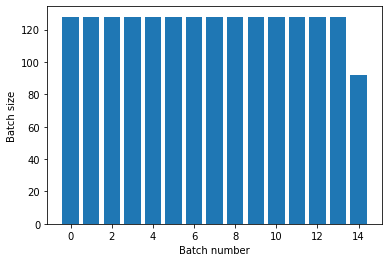

In [117]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

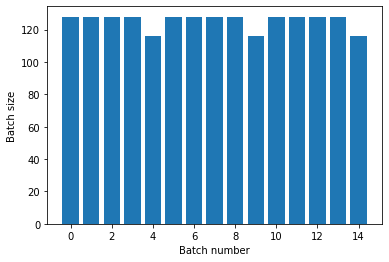

In [115]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [118]:
epochs = 3
dataset = titanic_lines.batch(128)
for epoch in range(epochs):
    for batch in dataset:
        print(batch.shape)
    print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


In [119]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size = 100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [127]:
n, line_batch = next(iter(dataset))
print(n.numpy())
print(line_batch.numpy())

[ 81  70  18 101  80  12  28  78  52  27  36  83  53  82   6  22  32  90
  17  55]
[b'0,male,21.0,0,1,77.2875,First,D,Southampton,n'
 b'1,female,23.0,3,2,263.0,First,C,Southampton,n'
 b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
 b'0,male,20.0,0,0,7.05,Third,unknown,Southampton,y'
 b'0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y'
 b'0,female,14.0,0,0,7.8542,Third,unknown,Southampton,y'
 b'0,male,28.0,1,0,82.1708,First,unknown,Cherbourg,n'
 b'0,male,34.0,1,0,26.0,Second,unknown,Southampton,n'
 b'1,male,28.0,1,1,15.2458,Third,unknown,Cherbourg,n'
 b'0,male,66.0,0,0,10.5,Second,unknown,Southampton,y'
 b'0,male,28.0,0,0,8.05,Third,unknown,Southampton,y'
 b'0,male,37.0,2,0,7.925,Third,unknown,Southampton,n'
 b'0,male,19.0,0,0,8.1583,Third,unknown,Southampton,y'
 b'0,male,33.0,0,0,8.6542,Third,unknown,Southampton,y'
 b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
 b'1,female,28.0,0,0,7.8792,Third,unknown,Queenstown,y'
 b'0,female,40.0,1,0,9.475,Third,unknown,Southampton,n'
 b'0,f

In [137]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(15).repeat(2)
print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(60).take(5):
    print(n.numpy())

Here are the item ID's near the epoch boundary:

[341 293 358  38 233 302  36 258 365 185 276 361 303 170 295]
[254 329 367 261 286 347 366 368 359 104 342 312 334 350 187]
[272 379 236 356 400 397 324 301 406 391 333 404 408 411 337]
[396 382 416 394 201 328 357 278 234 409 256 290 413 330 360]
[373 377 348 426 340 399 419 407 339 401 223 370 386 425 431]


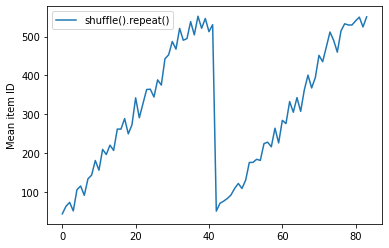

In [138]:
shuffled_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffled_repeat, label="shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()

In [139]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

In [141]:
print("Here are the item ID's near the epoch boundary:\n")
for n, line_batch in shuffled.skip(55).take(15):
    print(n.numpy())

Here are the item ID's near the epoch boundary:

[606 611   3 376   4 447 227 503 525 458]
[571  20  17 423 501 582 608   6 622 594]
[268 587 326 609 506  41  12 483  30  22]
[572 494  40 619  19  51 564 607 523 604]
[  7 504   1  59  37  58 625 575  54 612]
[ 44  50   2 620 388 603 530  13 322  38]
[ 81 521  39 542  82 329  47 578  23  11]
[468  61  91  53  78  60  72  49  21 567]
[ 70 522 107  79  95  88  87  15 479 562]
[552  34  90 610 569 474 113  84  35 105]
[  5  18  68  29 597  32 125 128  25 119]
[488  98  92  56  36  52  65 129  57 117]
[ 71 596 508 110 595 565 115 127 120 580]
[121 151 114 529  45 135 100 257 159 130]
[126  83  55 146  43  85 599 627  93  86]


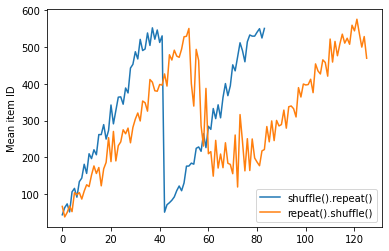

In [144]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffled_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

In [148]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [170]:
def parse_image(filename):
    parts = tf.strings.split(filename, '/')
    label = parts[-2]
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label


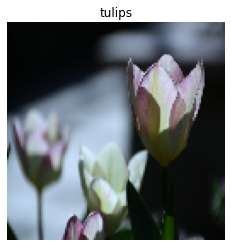

In [215]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis('off')
show(image, label)

In [216]:
images_ds = list_ds.map(parse_image)

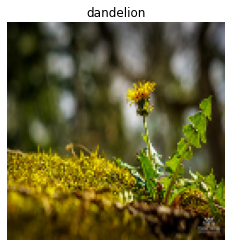

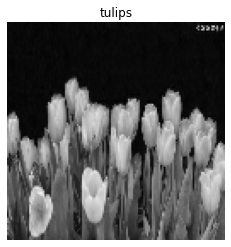

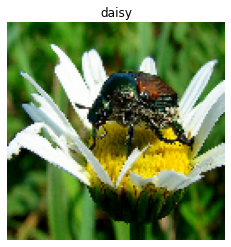

In [217]:
for image,label in images_ds.take(3):
    show(image, label)

In [218]:
import scipy.ndimage as ndimage
def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


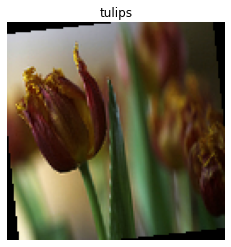

In [219]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

In [220]:
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    [image, ] = tf.py_function(random_rotate_image, [image], [tf.float32])
    image.set_shape(im_shape)
    print(im_shape)
    return image, label

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(128, 128, None)


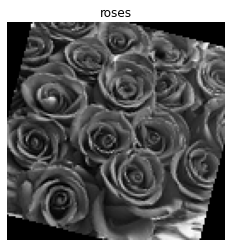

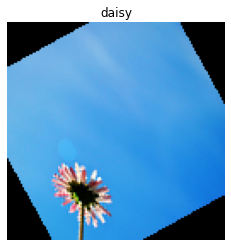

In [221]:
rot_ds = images_ds.map(tf_random_rotate_image)
for image, label in rot_ds.take(2):
    show(image, label)

In [222]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

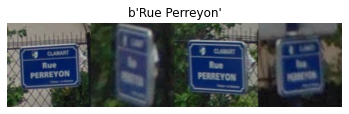

In [231]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())

feature = parsed.features.feature
raw_img = feature['image/encoded'].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
plt.axis('off')
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [232]:
raw_example = next(iter(dataset))

In [237]:
def tf_parse(eg):
    example = tf.io.parse_example(
        eg[tf.newaxis], {
            'image/encoded' : tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            'image/text' : tf.io.FixedLenFeature(shape=(), dtype=tf.string)
        }
    )
    return example['image/encoded'][0], example['image/text'][0]
img, txt = tf_parse(raw_example)
print(txt.numpy())
print(repr(img.numpy()[:20]), "...")

b'Rue Perreyon'
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X' ...


In [238]:
decoded = dataset.map(tf_parse)
decoded

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [239]:
image_batch, text_batch = next(iter(decoded.batch(10)))
image_batch.shape

TensorShape([10])

In [243]:
range_ds = tf.data.Dataset.range(100000)

In [245]:
batches = range_ds.batch(10, drop_remainder=True)
for batch in batches.take(5):
    print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


In [248]:
def dense_1_step(batch):
    return batch[:-1], batch[1:]
predict_dense_1_step = batches.map(dense_1_step)
for features, label in predict_dense_1_step.take(3):
    print(features.numpy(), " => ", label.numpy())


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]


In [250]:
batches = range_ds.batch(15, drop_remainder=True)
def label_next_5_steps(batch):
    return (
        batch[:-5],
        batch[-5:]
            )
predict_5_steps = batches.map(label_next_5_steps)
for features, label in predict_5_steps.take(3):
    print(features.numpy(), " => ", label.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]  =>  [25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42 43 44]


In [254]:
feature_length = 10
label_length = 5

features = range_ds.batch(feature_length, drop_remainder=True)
labels = range_ds.batch(feature_length).skip(1).map(lambda labels: labels[:-5])

predict_5_steps = tf.data.Dataset.zip((features, labels))

for features, label in predict_5_steps.take(3):
    print(features.numpy(), " => ", label.numpy())


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[10 11 12 13 14 15 16 17 18 19]  =>  [20 21 22 23 24]
[20 21 22 23 24 25 26 27 28 29]  =>  [30 31 32 33 34]


In [256]:
window_size = 5
windows = range_ds.window(window_size, shift = 1)
for sub_ds in windows.take(5):
    print(sub_ds)
    

<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


In [257]:
for x in windows.flat_map(lambda x: x).take(30):
    print(x.numpy(), end=' ')

Cause: could not parse the source code:

for x in windows.flat_map(lambda x: x).take(30):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

for x in windows.flat_map(lambda x: x).take(30):

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 7 8 9

In [258]:
def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

for example in windows.flat_map(sub_to_batch).take(5):
    print(example.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


In [261]:
def make_window_dataset(ds, window_size=5, shift=1, stride=1):
    windows = ds.window(window_size, shift=shift, stride=stride)

    def sub_to_batch(sub):
        return sub.batch(window_size, drop_remainder=True)
    
    windows = windows.flat_map(sub_to_batch)
    return windows

In [268]:
ds = make_window_dataset(range_ds, window_size=10, shift=5, stride=2)
for example in ds.take(10):
    print(example.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[ 0  2  4  6  8 10 12 14 16 18]
[ 5  7  9 11 13 15 17 19 21 23]
[10 12 14 16 18 20 22 24 26 28]
[15 17 19 21 23 25 27 29 31 33]
[20 22 24 26 28 30 32 34 36 38]
[25 27 29 31 33 35 37 39 41 43]
[30 32 34 36 38 40 42 44 46 48]
[35 37 39 41 43 45 47 49 51 53]
[40 42 44 46 48 50 52 54 56 58]
[45 47 49 51 53 55 57 59 61 63]


In [269]:
dense_labels_ds = ds.map(dense_1_step)
for inputs, labels in dense_labels_ds.take(3):
    print(inputs.numpy(), " => ", labels.numpy())

[ 0  2  4  6  8 10 12 14 16]  =>  [ 2  4  6  8 10 12 14 16 18]
[ 5  7  9 11 13 15 17 19 21]  =>  [ 7  9 11 13 15 17 19 21 23]
[10 12 14 16 18 20 22 24 26]  =>  [12 14 16 18 20 22 24 26 28]


In [271]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True
)
csv_path = zip_path.replace('.zip', '.csv')
csv_path

'/home/matheus/.keras/datasets/creditcard.csv'

In [272]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class", column_defaults=[float()]*30+[int()]
)

In [274]:
def count(counts, batch):
    features, labels = batch
    class_1 = labels == 1
    class_1 = tf.cast(class_1, tf.int32)

    class_0 = labels == 0
    class_0 = tf.cast(class_0, tf.int32)

    counts['class_0'] += tf.reduce_sum(class_0)
    counts['class_1'] += tf.reduce_sum(class_1)

    return counts

counts = creditcard_ds.take(10).reduce(initial_state = {'class_0' : 0, 'class_1':0},
                                        reduce_func = count)
counts = np.array([counts['class_0'].numpy(),
                    counts['class_1'].numpy()]).astype(np.float32)
fractions = counts/counts.sum()
print(fractions)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0.9952 0.0048]


In [275]:
negative_ds = (
    creditcard_ds.unbatch()
    .filter(lambda features, label: label == 0 )
    .repeat())
positive_ds = (
    creditcard_ds.unbatch()
    .filter(lambda features, label: label == 1)
    .repeat())

Cause: could not parse the source code:

    .filter(lambda features, label: label == 0 )

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

    .filter(lambda features, label: label == 0 )

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

    .filter(lambda features, label: label == 1)

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code:

    .filter(lambda features, label: label == 1)

This error may be avoided by creating the lambda in a standalone statement.

To silence this warning, decorate the function w

In [276]:
for features, label in positive_ds.batch(10).take(1):
    print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


In [284]:
balanced_ds = tf.data.experimental.sample_from_datasets(
    [negative_ds, positive_ds], [0.2, 0.8]).batch(10)

In [285]:
for features, labels in balanced_ds.take(10):
    print(labels.numpy())

[1 1 1 1 1 1 1 0 0 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 1 1]
[1 1 0 1 1 1 1 1 1 0]
[1 0 1 1 1 1 1 1 1 0]
[1 1 1 1 0 1 1 0 0 1]
[1 0 1 0 1 1 1 1 1 1]
[0 1 0 1 1 1 1 1 1 1]
[0 0 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 0]


In [286]:
def class_func(features, label):
    return label

In [287]:
resampler = tf.data.experimental.rejection_resample(class_func, target_dist=[0.5, 0.5], initial_dist=fractions)

In [288]:
resample_ds = creditcard_ds.unbatch().apply(resampler).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [289]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [290]:
for features, labels in balanced_ds.take(10):
    print(labels.numpy())

[1 1 0 0 0 1 1 1 0 0]
[0 1 1 0 0 0 0 0 1 0]
[0 0 1 1 1 0 0 1 0 1]
[0 1 0 1 0 1 1 1 1 0]
[1 0 0 0 1 1 1 0 0 0]
[0 0 1 1 1 1 1 0 1 0]
[0 1 0 0 1 0 1 1 0 0]
[1 1 0 0 1 0 0 1 0 0]
[1 0 1 0 1 0 1 0 0 0]
[1 1 1 1 0 1 0 1 1 0]


In [298]:
range_ds = tf.data.Dataset.range(200)
iterator = iter(range_ds)
ckpt = tf.train.Checkpoint(step=tf.Variable(0), iterator=iterator)
manager = tf.train.CheckpointManager(ckpt, '/tmp/my_ckpt', max_to_keep=3)

print([next(iterator).numpy() for _ in range(5)])

save_path = manager.save()



print([next(iterator).numpy() for _ in range(5)])

ckpt.restore(manager.latest_checkpoint)

print([next(iterator).numpy() for _ in range(5)])


[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]


In [308]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [311]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"]
)

In [312]:
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you ar

In [313]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss:", loss)
print("Accuracy:", accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8478
Loss: 0.44266802072525024
Accuracy: 0.8478000164031982


In [315]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8438
Loss:  0.48459094762802124
Accuracy:  0.84375


In [318]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps=10)
print(result.shape)
result

(320, 10)


array([[-9.3146e+00, -9.7989e+00, -7.8638e+00, ...,  2.7031e+00,
         1.5404e-02,  9.5819e+00],
       [ 6.9112e+00, -9.2377e+00, -5.6104e-01, ..., -2.4723e+01,
        -6.3719e+00, -1.5620e+01],
       [ 1.1192e+00, -6.3748e-02, -6.7901e-01, ..., -6.0715e+00,
        -3.4433e+00, -5.1368e+00],
       ...,
       [-1.0391e+01, -8.3110e+00, -6.1868e+00, ...,  7.8816e+00,
         6.0851e-01,  6.3931e+00],
       [ 9.6036e-01, -6.6913e+00, -1.4780e+00, ..., -2.5968e+01,
        -5.4367e+00, -2.2040e+01],
       [-6.7232e+00, -4.9845e+00, -3.9276e+00, ...,  7.9700e+00,
        -2.9190e-01,  3.1975e+00]], dtype=float32)

In [319]:
result = model.predict(fmnist_train_ds, steps=10)
print(result.shape)

(320, 10)


In [340]:
import tensorflow_datasets as tfds
def train_input_fn():
    titanic = tf.data.experimental.make_csv_dataset(
        titanic_file, batch_size=32, label_name="survived"
    )
    titanic_batches = (titanic.cache().repeat().shuffle(500)
    .prefetch(tf.data.experimental.AUTOTUNE)
    )
    return titanic_batches


In [341]:
embark = tf.feature_column.categorical_column_with_hash_bucket('embark_town', 32)
cls = tf.feature_column.categorical_column_with_vocabulary_list('class', ['First', 'Second', 'Third'])
age = tf.feature_column.numeric_column('age')

In [342]:
import tempfile
model_dir = tempfile.mkdtemp()
model = tf.estimator.LinearClassifier(
    model_dir=model_dir,
    feature_columns=[embark, cls, age],
    n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1o35_2ls', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [343]:
model = model.train(input_fn=train_input_fn, steps=100)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1o35_2ls/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmp1o35_2ls/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 0.65553975.


In [344]:
result = model.evaluate(train_input_fn, steps=10)
for key, value in result.items():
    print(key, " : ", value)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-13T06:49:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1o35_2ls/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Inference Time : 0.64381s
INFO:tensorflow:Finished evaluation at 2020-04-13-06:49:24
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.69375, accuracy_baseline = 0.65625, auc = 0.68924236, auc_precision_recall = 0.534077, average_loss = 0.60442865, global_step = 100, label/mean = 0.34375, loss = 0.60442

In [ ]:
for pred in model.predict(train_input_fn):
    for key, value in pred.items():
        print(key, " : ", value)
    break